In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\DELL\Downloads\UCI_Dataset.csv")

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
#Key Statistics
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [7]:
#  Remove Anomalies using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['outliers'] = iso_forest.fit_predict(df.drop('stabf', axis=1))


In [8]:
# Remove outliers
df_clean = df[df['outliers'] == 1].drop('outliers', axis=1)


In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import IsolationForest

# Load the dataset
df = pd.read_csv(r"C:\Users\DELL\Downloads\UCI_Dataset.csv")

# Separate independent and dependent variables
X = df.drop(columns=['stabf'])

# Remove outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X)
df_clean = df[outliers == 1]

# Save the cleaned dataset to a new CSV file
df_clean.to_csv('cleaned_UCI_Dataset.csv', index=False)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


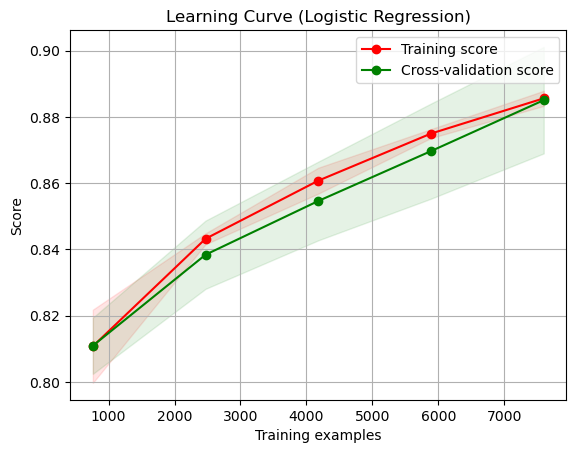

In [14]:
# Load the dataset
df_clean = pd.read_csv('C:\\Users\\DELL\\cleaned_UCI_Dataset.csv')

# Separate independent and dependent variables
X = df_clean.drop(columns=['stabf'])
y = df_clean['stabf']

# Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=1000, random_state=100)

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='recall_weighted', n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for Logistic Regression
title = "Learning Curve (Logistic Regression)"
plot_learning_curve(log_reg, title, X, y, cv=5)
plt.show()


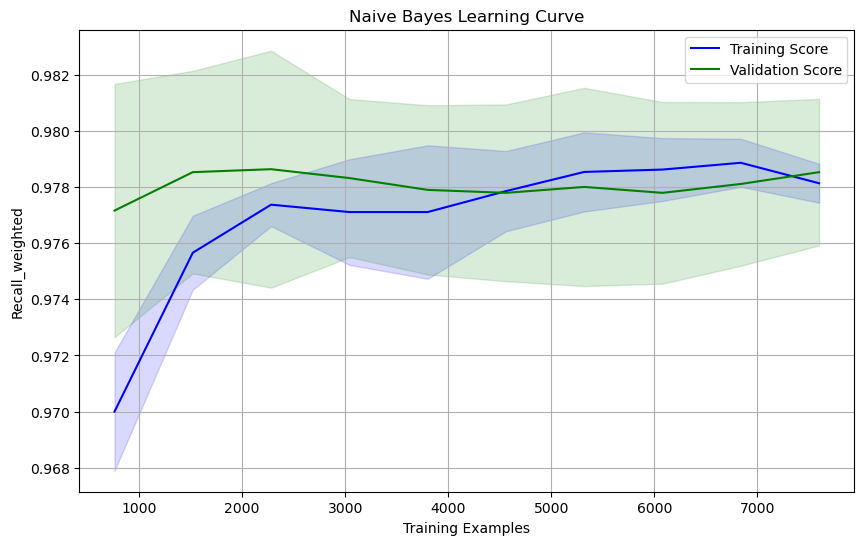

In [15]:
# Create a Naive Bayes classifier
naive_bayes = GaussianNB()

# Specify the evaluation metric (e.g., recall)
scoring = 'recall_weighted'

# Create learning curves
train_sizes, train_scores, valid_scores = learning_curve(
    naive_bayes, X, y, cv=5, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.15,
    color='blue',
)

plt.plot(train_sizes, valid_scores_mean, label='Validation Score', color='green')
plt.fill_between(
    train_sizes,
    valid_scores_mean - valid_scores_std,
    valid_scores_mean + valid_scores_std,
    alpha=0.15,
    color='green',
)

plt.title('Naive Bayes Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel(scoring.capitalize())
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from sklearn.naive_bayes import GaussianNB


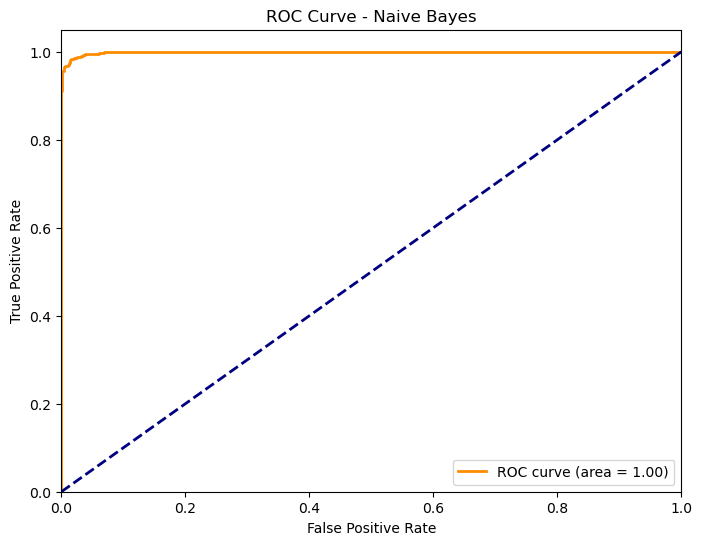

In [19]:
from sklearn.preprocessing import LabelEncoder

# Separate features and target variable
X = df_clean.drop('stabf', axis=1)
y = df_clean['stabf']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ...

# Plot ROC curve for Naive Bayes
plot_roc_curve(optimized_naive_bayes, X_test, y_test, 'Naive Bayes')


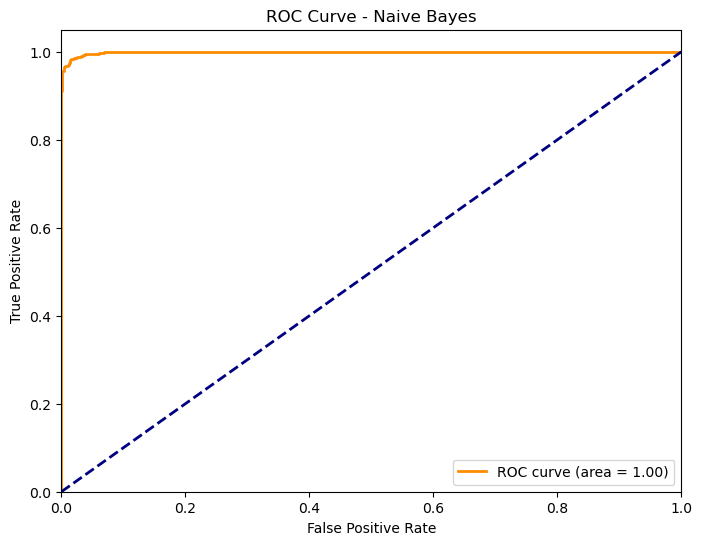

In [20]:
# Naive Bayes
from sklearn.metrics import roc_curve, auc

optimized_naive_bayes = GaussianNB()
optimized_naive_bayes.fit(X_train, y_train)  # Fit the model

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}'.format(model_name))
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curve for Naive Bayes
plot_roc_curve(optimized_naive_bayes, X_test, y_test, 'Naive Bayes')

In [23]:
# Separate features and target variable
from sklearn.preprocessing import StandardScaler

X = df_clean.drop('stabf', axis=1)
y = df_clean['stabf']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# 4. Create Optimized Models
# Logistic Regression
logreg = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=1000, random_state=100)
logreg.fit(X_train_scaled, y_train)

# Naïve Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)


GaussianNB()

Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

      stable       0.98      1.00      0.99       690
    unstable       1.00      0.99      0.99      1210

    accuracy                           0.99      1900
   macro avg       0.99      0.99      0.99      1900
weighted avg       0.99      0.99      0.99      1900

ROC/AUC: 1.00


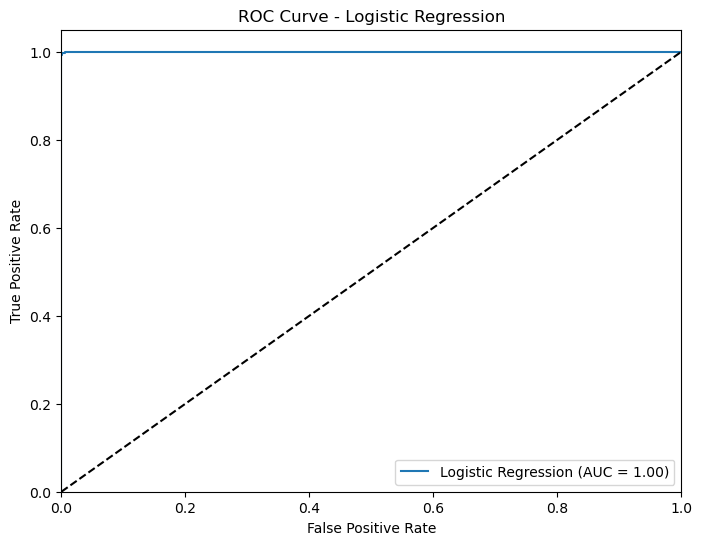


Naïve Bayes:
Classification Report:
              precision    recall  f1-score   support

      stable       0.97      0.98      0.98       690
    unstable       0.99      0.99      0.99      1210

    accuracy                           0.98      1900
   macro avg       0.98      0.98      0.98      1900
weighted avg       0.98      0.98      0.98      1900

ROC/AUC: 1.00


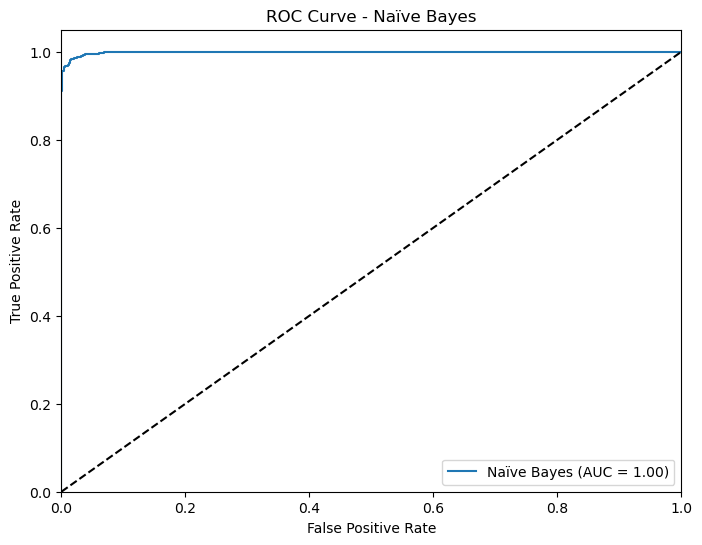

In [30]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Assuming you have already trained and optimized models (logreg, naive_bayes)

# Logistic Regression
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Naïve Bayes
y_pred_nb = naive_bayes.predict(X_test_scaled)
y_pred_prob_nb = naive_bayes.predict_proba(X_test_scaled)[:, 1]

# Classification Report and ROC/AUC for Logistic Regression
print("Logistic Regression:")
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# ROC/AUC for Logistic Regression
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test_binary, y_pred_prob_logreg)
roc_auc_logreg = roc_auc_score(y_test_binary, y_pred_prob_logreg)

# Print ROC/AUC and plot ROC curve for Logistic Regression
print(f"ROC/AUC: {roc_auc_logreg:.2f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Classification Report and ROC/AUC for Naïve Bayes
print("\nNaïve Bayes:")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# ROC/AUC for Naïve Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_binary, y_pred_prob_nb)
roc_auc_nb = roc_auc_score(y_test_binary, y_pred_prob_nb)

# Print ROC/AUC and plot ROC curve for Naïve Bayes
print(f"ROC/AUC: {roc_auc_nb:.2f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naïve Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naïve Bayes')
plt.legend(loc="lower right")
plt.show()


In [33]:
from sklearn.model_selection import GridSearchCV

# Assuming you have X_train_scaled, y_train for training

# Define Logistic Regression model
logreg = LogisticRegression()

# Define hyperparameters to tune
param_grid = {
    'solver': ['lbfgs'],
    'class_weight': ['balanced'],
    'max_iter': [1000],
    'random_state': [100]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_logreg = GridSearchCV(logreg, param_grid, scoring='recall_weighted', cv=5)
grid_search_logreg.fit(X_train_scaled, y_train)

# Get the best estimator from the grid search
optimized_logreg = grid_search_logreg.best_estimator_

# Now you can use optimized_logreg in your ensemble model


Ensemble Voting Model:
Classification Report:
              precision    recall  f1-score   support

      stable       0.98      1.00      0.99       690
    unstable       1.00      0.99      0.99      1210

    accuracy                           0.99      1900
   macro avg       0.99      0.99      0.99      1900
weighted avg       0.99      0.99      0.99      1900

ROC/AUC: 1.00


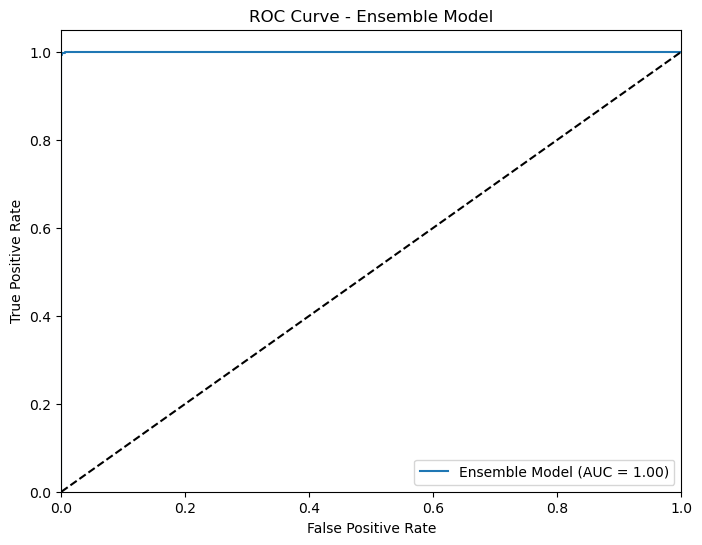

In [34]:
from sklearn.ensemble import VotingClassifier

# Assuming you have optimized models: optimized_logreg and optimized_naive_bayes
# You can choose one of them as the base model for the ensemble

# Create Ensemble Voting Model
ensemble_model = VotingClassifier(estimators=[
    ('logreg', optimized_logreg),  # or ('naive_bayes', optimized_naive_bayes)
], voting='soft')  # 'soft' for using predicted probabilities

# Fit the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_ensemble = ensemble_model.predict(X_test_scaled)
y_pred_prob_ensemble = ensemble_model.predict_proba(X_test_scaled)[:, 1]

# Classification Report and ROC/AUC for Ensemble Model
print("Ensemble Voting Model:")
print("Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# ROC/AUC for Ensemble Model
fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(y_test_binary, y_pred_prob_ensemble)
roc_auc_ensemble = roc_auc_score(y_test_binary, y_pred_prob_ensemble)

# Print ROC/AUC and plot ROC curve for Ensemble Model
print(f"ROC/AUC: {roc_auc_ensemble:.2f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, label=f'Ensemble Model (AUC = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ensemble Model')
plt.legend(loc="lower right")
plt.show()
